Accuracy: 0.9


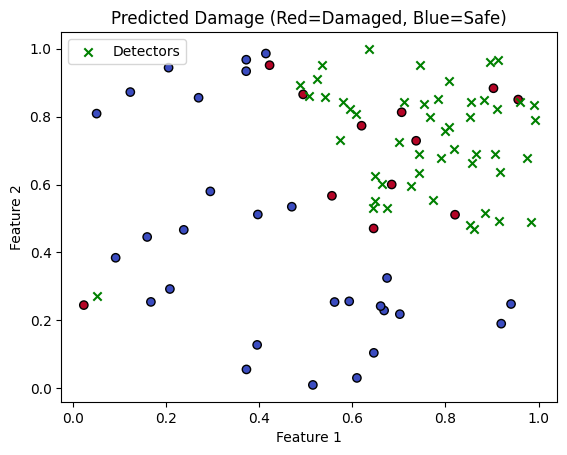

In [2]:
#3 AIS

import numpy as np
import matplotlib.pyplot as plt

# 1. Generate simple synthetic data
def generate_data(n=200):
    X = np.random.rand(n, 2)  # 2D data (2 features)
    y = ((X[:, 0] > 0.5) & (X[:, 1] > 0.5)).astype(int)  # 1 if both > 0.5, else 0
    return X, y

# 2. NSA Classifier
class NSAClassifier:
    def __init__(self, num_detectors=50, radius=0.1):
        self.num_detectors = num_detectors  # Number of detectors
        self.radius = radius  # Distance threshold
        self.detectors = []  # Store detectors

    def train(self, X_self):
        # Generate detectors far from "self" (safe) points
        while len(self.detectors) < self.num_detectors:
            candidate = np.random.rand(2)  # Random point
            if all(np.linalg.norm(candidate - x) > self.radius for x in X_self):
                self.detectors.append(candidate)

    def predict(self, X):
        predictions = []
        for x in X:
            # If close to any detector, classify as "damaged" (1)
            if any(np.linalg.norm(x - d) <= self.radius for d in self.detectors):
                predictions.append(1)
            else:
                predictions.append(0)  # Else "safe" (0)
        return np.array(predictions)

# 3. Train and test
X, y = generate_data()  # Get data
split = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_self = X_train[y_train == 0]  # "Safe" training data (self)

clf = NSAClassifier(num_detectors=50, radius=0.1)  # Create classifier
clf.train(X_self)  # Train on safe data
y_pred = clf.predict(X_test)  # Predict on test data

# 4. Calculate accuracy
acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)

# 5. Visualize results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.scatter(np.array(clf.detectors)[:, 0], np.array(clf.detectors)[:, 1],
            c='green', marker='x', label='Detectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted Damage (Red=Damaged, Blue=Safe)')
plt.legend()
plt.show()
